In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax


In [2]:
data  = pd.read_csv("data_for_lr.csv")
data

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


### Data Processing

In [4]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [5]:
data = data.dropna()
print("shape of the data",data.shape)

shape of the data (699, 2)


### Splitting Data

In [6]:
# training input and output
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)
# validation of data input and output
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:700]).reshape(199,1)

In [7]:
print(f"trainging input data shape={train_input.shape}")
print(f"trainging output data shape={train_output.shape}")
print(f"testing input data shape={test_input.shape}")
print(f"testing output data shape={test_output.shape}")

trainging input data shape=(500, 1)
trainging output data shape=(500, 1)
testing input data shape=(199, 1)
testing output data shape=(199, 1)


<font color="red" size='10px'><b>Linear Regression</b> </font>

forward propagation

f(x) = m*x + c

In [19]:
def forward_propagation(train_input,parameters):
    m = parameters["m"]
    c = parameters["c"]
    predictions = np.multiply(m,train_input)+c
    print(predictions)
    return predictions

<font color="red" size='50px'><b>Cost Function</b> </font>

summation(1/2n*(y-f(x))^2)

In [20]:
def cost_function(predictions,train_output):
    cost = ((train_output - predictions)**2)*0.5
    return cost

<font color="red" size='40px'><b>Gradient Descent for Backpropagation</b> </font>

1. **df = summ((f(x)) - y)/n**
2. **dm = del(cost)/del(m)=df * x**
3. **dc = del(cost)/del(c)=df * 1**

**(d(cost)/dm = d(cost)/df * df/dm)**

In [21]:
def backward_propagation(train_input,train_output,predictions):
    derivatives = dict()
    df = predictions - train_output
    dm = np.mean(np.multiply(df,train_input))
    dc = np.mean(df)
    derivatives["dm"] = dm
    derivatives["dc"] = dc
    return derivatives

### Update Parameters

In [22]:
def update_parameters(parameters,derivatives,learning_rate):
    parameters["m"] = parameters["m"] -learning_rate * derivatives["dm"]
    parameters["m"] = parameters["m"] - learning_rate * derivatives["dc"]
    return parameters

<font color="red" size='50px'><b>Model Training</b> </font>

In [23]:
def train(train_input,train_output,learning_rate,iters):
    parameters = dict()

    # random parameters
    parameters["m"] = np.random.uniform(0,1) -1
    parameters["c"] = np.random.uniform(0,1) - 1
    
    plt.figure()

    # loss
    loss = list()
    # iteration
    for i in range(iters):

        # forward propagation
        predictions =forward_propagation(train_input,parameters)

        # cost
        cost = cost_function(predictions,train_output)

        loss.append(cost)
        print(f"iteration ={i+1},loss={cost}")

        #plot
        
        fig,ax = plt.subplots()
        ax.plot(train_input,train_output,"+",label ="Original")
        ax.plot(train_input,predictions,"+",label ="Training")
        ax.legend()
        plt.plot(train_input,train_output,"+",label="Original")
        plt.plot(train_input,predictions,"+",label="Original")
        plt.show()

        # backpropagation
        derivatives = backward_propagation(train_input,train_output,predictions)

        # update parameters
        parameters = update_parameters(parameters,derivatives,learning_rate)

    return parameters

### Training

[[ -7.61368855]
 [-15.16743943]
 [ -4.99892863]
 [-11.68109287]
 [-25.91700799]
 [-11.10003511]
 [ -4.12734199]
 [-24.17383471]
 [ -7.90421743]
 [ -2.09363983]
 [ -5.28945751]
 [ -5.28945751]
 [ -7.61368855]
 [-11.97162175]
 [-16.32955495]
 [-18.07272823]
 [ -8.19474631]
 [-21.84960367]
 [ -9.06633295]
 [ -9.64739071]
 [-20.39695927]
 [-25.91700799]
 [-17.49167047]
 [-16.32955495]
 [-25.04542135]
 [-17.49167047]
 [-14.87691055]
 [ -6.45157303]
 [-26.78859463]
 [-14.58638167]
 [ -1.80311095]
 [ -7.90421743]
 [-12.84320839]
 [ -0.64099543]
 [-18.07272823]
 [-27.66018127]
 [-11.97162175]
 [ -2.67469759]
 [ -6.74210191]
 [-20.39695927]
 [-25.04542135]
 [ -0.64099543]
 [-17.49167047]
 [ -6.16104415]
 [-11.10003511]
 [ -6.16104415]
 [-17.78219935]
 [-15.45796831]
 [ -6.16104415]
 [-10.22844847]
 [-25.33595023]
 [-13.42426615]
 [ -2.09363983]
 [-17.78219935]
 [ -4.70839975]
 [ -3.25575535]
 [-22.43066143]
 [-20.68748815]
 [ -3.54628423]
 [ -5.57998639]
 [-17.49167047]
 [-22.14013255]
 [ -6.74

<Figure size 640x480 with 0 Axes>

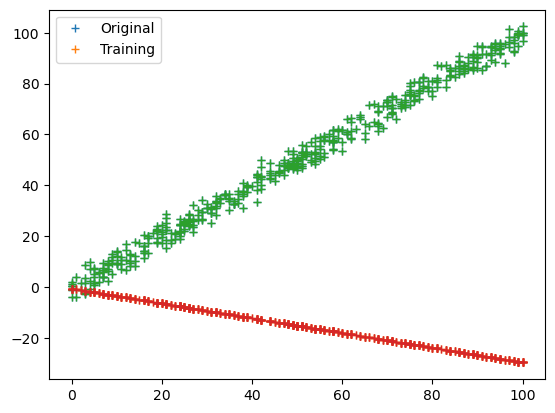

[[ 2.7042809 ]
 [ 6.32833025]
 [ 1.44980228]
 [ 4.65569209]
 [11.48563125]
 [ 4.37691906]
 [ 1.03164274]
 [10.64931217]
 [ 2.84366741]
 [ 0.05593714]
 [ 1.58918879]
 [ 1.58918879]
 [ 2.7042809 ]
 [ 4.7950786 ]
 [ 6.88587631]
 [ 7.72219539]
 [ 2.98305393]
 [ 9.53422006]
 [ 3.40121347]
 [ 3.67998649]
 [ 8.8372875 ]
 [11.48563125]
 [ 7.44342236]
 [ 6.88587631]
 [11.06747171]
 [ 7.44342236]
 [ 6.18894374]
 [ 2.14673485]
 [11.90379079]
 [ 6.04955722]
 [-0.08344937]
 [ 2.84366741]
 [ 5.21323814]
 [-0.64099543]
 [ 7.72219539]
 [12.32195033]
 [ 4.7950786 ]
 [ 0.33471017]
 [ 2.28612136]
 [ 8.8372875 ]
 [11.06747171]
 [-0.64099543]
 [ 7.44342236]
 [ 2.00734833]
 [ 4.37691906]
 [ 2.00734833]
 [ 7.58280887]
 [ 6.46771677]
 [ 2.00734833]
 [ 3.95875952]
 [11.20685823]
 [ 5.49201117]
 [ 0.05593714]
 [ 7.58280887]
 [ 1.31041576]
 [ 0.6134832 ]
 [ 9.81299309]
 [ 8.97667401]
 [ 0.75286971]
 [ 1.7285753 ]
 [ 7.44342236]
 [ 9.67360658]
 [ 2.28612136]
 [ 6.46771677]
 [ 2.00734833]
 [ 6.32833025]
 [ 2.70428

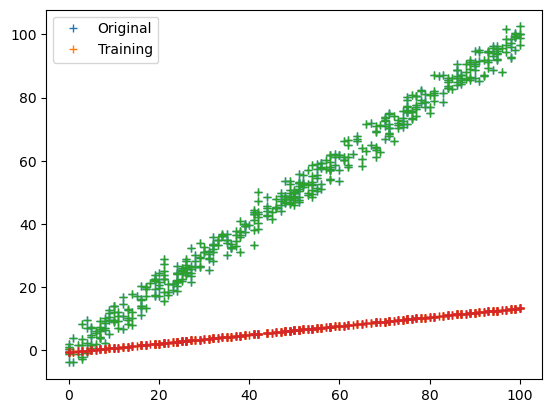

[[ 9.60398136]
 [20.70270621]
 [ 5.76211506]
 [15.58021781]
 [36.49704541]
 [14.72646975]
 [ 4.48149297]
 [33.93580122]
 [10.03085539]
 [ 1.49337474]
 [ 6.1889891 ]
 [ 6.1889891 ]
 [ 9.60398136]
 [16.00709185]
 [22.41020234]
 [24.97144653]
 [10.45772942]
 [30.52080896]
 [11.73835152]
 [12.59209959]
 [28.38643879]
 [36.49704541]
 [24.11769847]
 [22.41020234]
 [35.21642331]
 [24.11769847]
 [20.27583217]
 [ 7.89648523]
 [37.77766751]
 [19.84895814]
 [ 1.06650071]
 [10.03085539]
 [17.28771394]
 [-0.64099543]
 [24.97144653]
 [39.05828961]
 [16.00709185]
 [ 2.3471228 ]
 [ 8.32335926]
 [28.38643879]
 [35.21642331]
 [-0.64099543]
 [24.11769847]
 [ 7.46961119]
 [14.72646975]
 [ 7.46961119]
 [24.5445725 ]
 [21.12958024]
 [ 7.46961119]
 [13.44584765]
 [35.64329735]
 [18.14146201]
 [ 1.49337474]
 [24.5445725 ]
 [ 5.33524103]
 [ 3.20087087]
 [31.37455702]
 [28.81331282]
 [ 3.6277449 ]
 [ 6.61586313]
 [24.11769847]
 [30.94768299]
 [ 8.32335926]
 [21.12958024]
 [ 7.46961119]
 [20.70270621]
 [ 9.60398

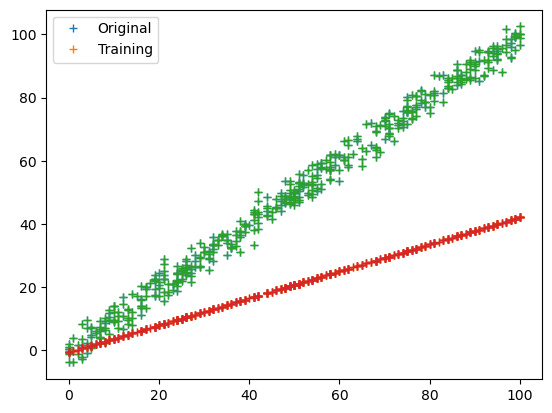

[[ 1.42178607e+01]
 [ 3.03149549e+01]
 [ 8.64578967e+00]
 [ 2.28855268e+01]
 [ 5.32223581e+01]
 [ 2.16472888e+01]
 [ 6.78843265e+00]
 [ 4.95076441e+01]
 [ 1.48369797e+01]
 [ 2.45459961e+00]
 [ 9.26490868e+00]
 [ 9.26490868e+00]
 [ 1.42178607e+01]
 [ 2.35046458e+01]
 [ 3.27914309e+01]
 [ 3.65061450e+01]
 [ 1.54560987e+01]
 [ 4.45546921e+01]
 [ 1.73134558e+01]
 [ 1.85516938e+01]
 [ 4.14590970e+01]
 [ 5.32223581e+01]
 [ 3.52679070e+01]
 [ 3.27914309e+01]
 [ 5.13650011e+01]
 [ 3.52679070e+01]
 [ 2.96958359e+01]
 [ 1.17413847e+01]
 [ 5.50797152e+01]
 [ 2.90767169e+01]
 [ 1.83548060e+00]
 [ 1.48369797e+01]
 [ 2.53620028e+01]
 [-6.40995425e-01]
 [ 3.65061450e+01]
 [ 5.69370722e+01]
 [ 2.35046458e+01]
 [ 3.69283762e+00]
 [ 1.23605037e+01]
 [ 4.14590970e+01]
 [ 5.13650011e+01]
 [-6.40995425e-01]
 [ 3.52679070e+01]
 [ 1.11222657e+01]
 [ 2.16472888e+01]
 [ 1.11222657e+01]
 [ 3.58870260e+01]
 [ 3.09340739e+01]
 [ 1.11222657e+01]
 [ 1.97899318e+01]
 [ 5.19841201e+01]
 [ 2.66002409e+01]
 [ 2.4545996

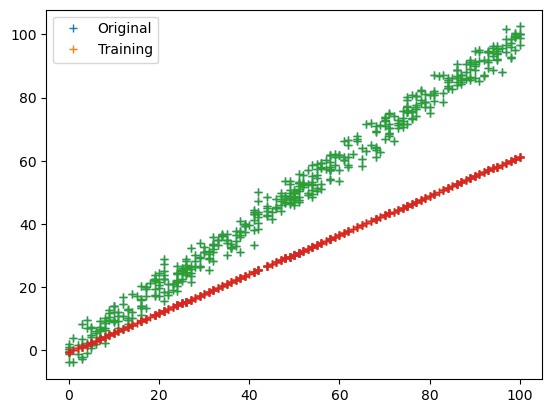

[[17.30319509]
 [36.74273481]
 [10.57412365]
 [27.77063956]
 [64.40669519]
 [26.27529035]
 [ 8.33109983]
 [59.92064756]
 [18.05086969]
 [ 3.0973776 ]
 [11.32179825]
 [11.32179825]
 [17.30319509]
 [28.51831416]
 [39.73343323]
 [44.21948086]
 [18.7985443 ]
 [53.93925072]
 [21.04156811]
 [22.53691732]
 [50.2008777 ]
 [64.40669519]
 [42.72413165]
 [39.73343323]
 [62.16367137]
 [42.72413165]
 [35.99506021]
 [14.31249667]
 [66.649719  ]
 [35.2473856 ]
 [ 2.34970299]
 [18.05086969]
 [30.76133797]
 [-0.64099543]
 [44.21948086]
 [68.89274282]
 [28.51831416]
 [ 4.59272681]
 [15.06017127]
 [50.2008777 ]
 [62.16367137]
 [-0.64099543]
 [42.72413165]
 [13.56482207]
 [26.27529035]
 [13.56482207]
 [43.47180625]
 [37.49040942]
 [13.56482207]
 [24.03226653]
 [62.91134598]
 [32.25668718]
 [ 3.0973776 ]
 [43.47180625]
 [ 9.82644904]
 [ 6.08807602]
 [55.43459993]
 [50.9485523 ]
 [ 6.83575062]
 [12.06947286]
 [42.72413165]
 [54.68692533]
 [15.06017127]
 [37.49040942]
 [13.56482207]
 [36.74273481]
 [17.30319

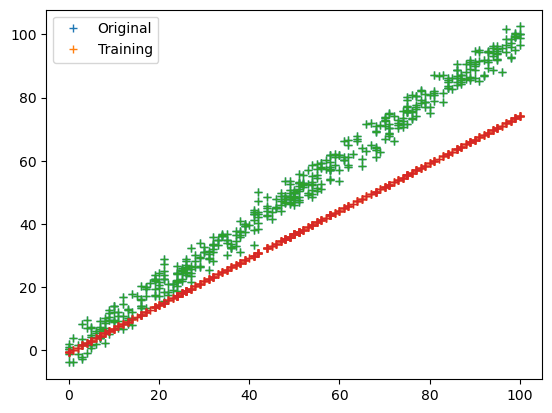

[[19.36638039]
 [41.04103752]
 [11.86361446]
 [31.03734961]
 [71.8857419 ]
 [29.37006829]
 [ 9.36269248]
 [66.88389794]
 [20.20002105]
 [ 3.52720787]
 [12.69725512]
 [12.69725512]
 [19.36638039]
 [31.87099027]
 [44.37560015]
 [49.37744411]
 [21.03366171]
 [60.21477267]
 [23.53458368]
 [25.201865  ]
 [56.04656938]
 [71.8857419 ]
 [47.71016279]
 [44.37560015]
 [69.38481992]
 [47.71016279]
 [40.20739686]
 [16.03181775]
 [74.38666387]
 [39.3737562 ]
 [ 2.69356721]
 [20.20002105]
 [34.37191225]
 [-0.64099543]
 [49.37744411]
 [76.88758585]
 [31.87099027]
 [ 5.19448919]
 [16.86545841]
 [56.04656938]
 [69.38481992]
 [-0.64099543]
 [47.71016279]
 [15.19817709]
 [29.37006829]
 [15.19817709]
 [48.54380345]
 [41.87467818]
 [15.19817709]
 [26.86914632]
 [70.21846058]
 [36.03919357]
 [ 3.52720787]
 [48.54380345]
 [11.0299738 ]
 [ 6.8617705 ]
 [61.88205399]
 [56.88021004]
 [ 7.69541116]
 [13.53089578]
 [47.71016279]
 [61.04841333]
 [16.86545841]
 [41.87467818]
 [15.19817709]
 [41.04103752]
 [19.36638

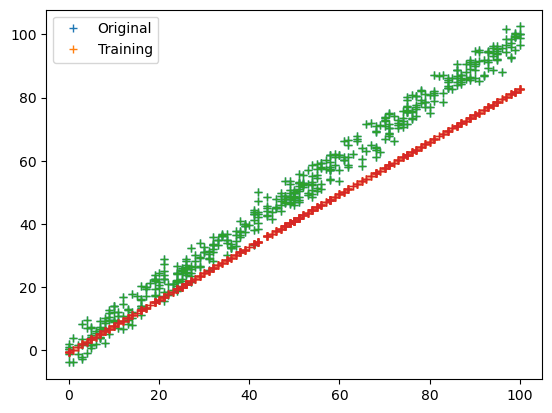

[[20.74604725]
 [43.91534349]
 [12.72590625]
 [33.22182215]
 [76.88703428]
 [31.43956859]
 [10.05252591]
 [71.54027361]
 [21.63717403]
 [ 3.81463847]
 [13.61703303]
 [13.61703303]
 [20.74604725]
 [34.11294893]
 [47.4798506 ]
 [52.82661127]
 [22.52830081]
 [64.41125939]
 [25.20168114]
 [26.9839347 ]
 [59.95562549]
 [76.88703428]
 [51.04435771]
 [47.4798506 ]
 [74.21365395]
 [51.04435771]
 [43.02421671]
 [17.18154014]
 [79.56041462]
 [42.13308993]
 [ 2.92351169]
 [21.63717403]
 [36.78632926]
 [-0.64099543]
 [52.82661127]
 [82.23379495]
 [34.11294893]
 [ 5.59689202]
 [18.07266692]
 [59.95562549]
 [74.21365395]
 [-0.64099543]
 [51.04435771]
 [16.29041336]
 [31.43956859]
 [16.29041336]
 [51.93548449]
 [44.80647026]
 [16.29041336]
 [28.76618826]
 [75.10478072]
 [38.56858282]
 [ 3.81463847]
 [51.93548449]
 [11.83477947]
 [ 7.37914558]
 [66.19351294]
 [60.84675227]
 [ 8.27027236]
 [14.5081598 ]
 [51.04435771]
 [65.30238616]
 [18.07266692]
 [44.80647026]
 [16.29041336]
 [43.91534349]
 [20.74604

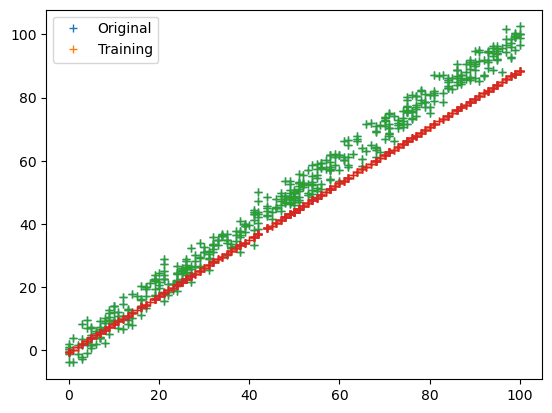

[[21.66864042]
 [45.83741258]
 [13.30252698]
 [34.68259466]
 [80.23143451]
 [32.82345834]
 [10.5138225 ]
 [74.65402555]
 [22.59820858]
 [ 4.00684538]
 [14.23209514]
 [14.23209514]
 [21.66864042]
 [35.61216282]
 [49.55568522]
 [55.13309418]
 [23.52777674]
 [67.21748027]
 [26.31648122]
 [28.17561754]
 [62.56963946]
 [80.23143451]
 [53.27395786]
 [49.55568522]
 [77.44273003]
 [53.27395786]
 [44.90784442]
 [17.95036778]
 [83.02013899]
 [43.97827626]
 [ 3.07727722]
 [22.59820858]
 [38.4008673 ]
 [-0.64099543]
 [55.13309418]
 [85.80884347]
 [35.61216282]
 [ 5.8659817 ]
 [18.87993594]
 [62.56963946]
 [77.44273003]
 [-0.64099543]
 [53.27395786]
 [17.02079962]
 [32.82345834]
 [17.02079962]
 [54.20352602]
 [46.76698074]
 [17.02079962]
 [30.03475386]
 [78.37229819]
 [40.26000362]
 [ 4.00684538]
 [54.20352602]
 [12.37295882]
 [ 7.72511802]
 [69.07661659]
 [63.49920762]
 [ 8.65468618]
 [15.1616633 ]
 [53.27395786]
 [68.14704843]
 [18.87993594]
 [46.76698074]
 [17.02079962]
 [45.83741258]
 [21.66864

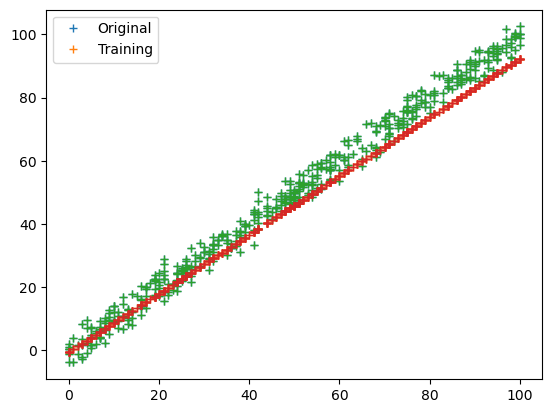

[[22.28558511]
 [47.12271403]
 [13.68811741]
 [35.65942376]
 [82.46785902]
 [33.74887538]
 [10.82229484]
 [76.73621388]
 [23.2408593 ]
 [ 4.13537552]
 [14.6433916 ]
 [14.6433916 ]
 [22.28558511]
 [36.61469795]
 [50.94381078]
 [56.67545592]
 [24.19613349]
 [69.09402037]
 [27.06195606]
 [28.97250443]
 [64.31764943]
 [82.46785902]
 [54.76490754]
 [50.94381078]
 [79.60203645]
 [54.76490754]
 [46.16743984]
 [18.46448835]
 [85.33368159]
 [45.21216565]
 [ 3.18010133]
 [23.2408593 ]
 [39.48052051]
 [-0.64099543]
 [56.67545592]
 [88.19950415]
 [36.61469795]
 [ 6.0459239 ]
 [19.41976254]
 [64.31764943]
 [79.60203645]
 [-0.64099543]
 [54.76490754]
 [17.50921417]
 [33.74887538]
 [17.50921417]
 [55.72018173]
 [48.07798821]
 [17.50921417]
 [30.88305281]
 [80.55731064]
 [41.39106889]
 [ 4.13537552]
 [55.72018173]
 [12.73284322]
 [ 7.95647228]
 [71.00456875]
 [65.27292362]
 [ 8.91174646]
 [15.59866579]
 [54.76490754]
 [70.04929456]
 [19.41976254]
 [48.07798821]
 [17.50921417]
 [47.12271403]
 [22.28558

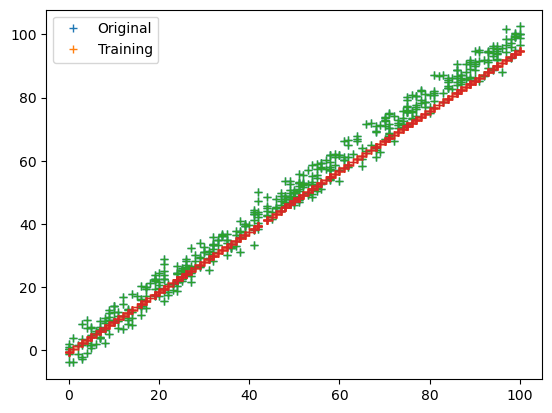

[[22.69814047]
 [47.98220435]
 [13.94596451]
 [36.31263641]
 [83.96337219]
 [34.36770842]
 [11.02857252]
 [78.12858822]
 [23.67060446]
 [ 4.22132455]
 [14.9184285 ]
 [14.9184285 ]
 [22.69814047]
 [37.2851004 ]
 [51.87206034]
 [57.70684431]
 [24.64306846]
 [70.34887625]
 [27.56046045]
 [29.50538844]
 [65.48655627]
 [83.96337219]
 [55.76191632]
 [51.87206034]
 [81.0459802 ]
 [55.76191632]
 [47.00974036]
 [18.80828449]
 [86.88076418]
 [46.03727636]
 [ 3.24886056]
 [23.67060446]
 [40.20249239]
 [-0.64099543]
 [57.70684431]
 [89.79815616]
 [37.2851004 ]
 [ 6.16625254]
 [19.78074848]
 [65.48655627]
 [81.0459802 ]
 [-0.64099543]
 [55.76191632]
 [17.83582049]
 [34.36770842]
 [17.83582049]
 [56.73438031]
 [48.95466835]
 [17.83582049]
 [31.45031643]
 [82.0184442 ]
 [42.14742038]
 [ 4.22132455]
 [56.73438031]
 [12.97350051]
 [ 8.11118054]
 [72.29380424]
 [66.45902027]
 [ 9.08364453]
 [15.8908925 ]
 [55.76191632]
 [71.32134025]
 [19.78074848]
 [48.95466835]
 [17.83582049]
 [47.98220435]
 [22.69814

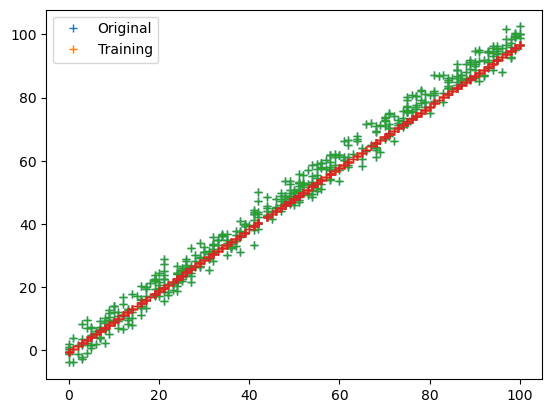

[[22.97401921]
 [48.55695173]
 [14.11838872]
 [36.74944441]
 [84.96343262]
 [34.78152652]
 [11.16651189]
 [79.05967896]
 [23.95797815]
 [ 4.27879929]
 [15.10234766]
 [15.10234766]
 [22.97401921]
 [37.73340335]
 [52.4927875 ]
 [58.39654116]
 [24.94193709]
 [71.18800742]
 [27.89381392]
 [29.86173181]
 [66.2682127 ]
 [84.96343262]
 [56.42862327]
 [52.4927875 ]
 [82.01155579]
 [56.42862327]
 [47.57299278]
 [19.03818344]
 [87.91530945]
 [46.58903384]
 [ 3.29484035]
 [23.95797815]
 [40.68528018]
 [-0.64099543]
 [58.39654116]
 [90.86718628]
 [37.73340335]
 [ 6.24671718]
 [20.02214238]
 [66.2682127 ]
 [82.01155579]
 [-0.64099543]
 [56.42862327]
 [18.05422449]
 [34.78152652]
 [18.05422449]
 [57.41258221]
 [49.54091067]
 [18.05422449]
 [31.82964969]
 [82.99551473]
 [42.65319807]
 [ 4.27879929]
 [57.41258221]
 [13.13442978]
 [ 8.21463506]
 [73.1559253 ]
 [67.25217164]
 [ 9.198594  ]
 [16.08630661]
 [56.42862327]
 [72.17196636]
 [20.02214238]
 [49.54091067]
 [18.05422449]
 [48.55695173]
 [22.97401

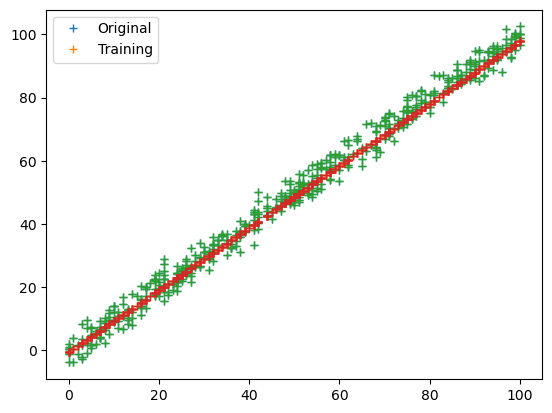

[[23.15850131]
 [48.94128943]
 [14.23369003]
 [37.04154107]
 [85.63218022]
 [35.05824967]
 [11.25875294]
 [79.68230604]
 [24.150147  ]
 [ 4.31723306]
 [15.22533573]
 [15.22533573]
 [23.15850131]
 [38.03318676]
 [52.90787222]
 [58.8577464 ]
 [25.1417927 ]
 [71.74914047]
 [28.11672979]
 [30.10002119]
 [66.79091198]
 [85.63218022]
 [56.87445501]
 [52.90787222]
 [82.65724313]
 [56.87445501]
 [47.94964373]
 [19.19191852]
 [88.60711732]
 [46.95799804]
 [ 3.32558736]
 [24.150147  ]
 [41.00812385]
 [-0.64099543]
 [58.8577464 ]
 [91.58205441]
 [38.03318676]
 [ 6.30052445]
 [20.18356421]
 [66.79091198]
 [82.65724313]
 [-0.64099543]
 [56.87445501]
 [18.20027282]
 [35.05824967]
 [18.20027282]
 [57.86610071]
 [49.93293513]
 [18.20027282]
 [32.08331258]
 [83.64888883]
 [42.99141525]
 [ 4.31723306]
 [57.86610071]
 [13.24204433]
 [ 8.28381585]
 [73.73243186]
 [67.78255768]
 [ 9.27546155]
 [16.21698143]
 [56.87445501]
 [72.74078616]
 [20.18356421]
 [49.93293513]
 [18.20027282]
 [48.94128943]
 [23.15850

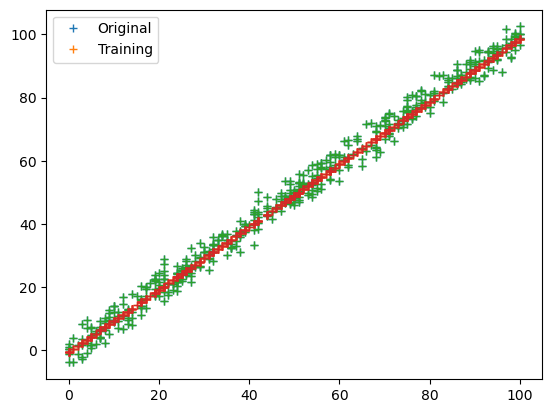

[[23.28186581]
 [49.19829882]
 [14.31079285]
 [37.2368682 ]
 [86.07937656]
 [35.24329643]
 [11.32043519]
 [80.09866126]
 [24.2786517 ]
 [ 4.342934  ]
 [15.30757873]
 [15.30757873]
 [23.28186581]
 [38.23365409]
 [53.18544236]
 [59.16615767]
 [25.27543758]
 [72.12437418]
 [28.26579524]
 [30.25936701]
 [67.14044475]
 [86.07937656]
 [57.1725859 ]
 [53.18544236]
 [83.08901891]
 [57.1725859 ]
 [48.20151294]
 [19.29472227]
 [89.06973422]
 [47.20472705]
 [ 3.34614811]
 [24.2786517 ]
 [41.22401174]
 [-0.64099543]
 [59.16615767]
 [92.06009187]
 [38.23365409]
 [ 6.33650577]
 [20.29150816]
 [67.14044475]
 [83.08901891]
 [-0.64099543]
 [57.1725859 ]
 [18.29793639]
 [35.24329643]
 [18.29793639]
 [58.16937179]
 [50.19508471]
 [18.29793639]
 [32.25293878]
 [84.0858048 ]
 [43.21758351]
 [ 4.342934  ]
 [58.16937179]
 [13.31400696]
 [ 8.33007754]
 [74.11794595]
 [68.13723064]
 [ 9.32686342]
 [16.30436462]
 [57.1725859 ]
 [73.12116006]
 [20.29150816]
 [50.19508471]
 [18.29793639]
 [49.19829882]
 [23.28186

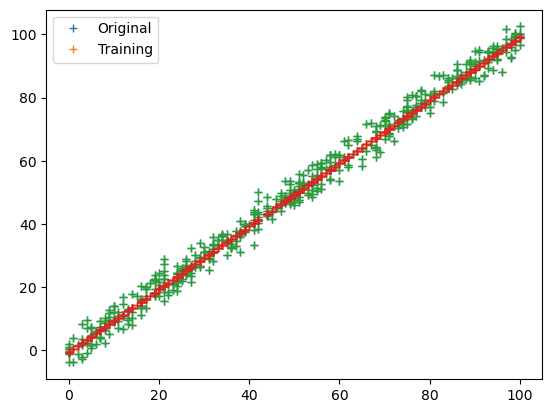

[[23.36436055]
 [49.37016285]
 [14.36235206]
 [37.36748487]
 [86.37841998]
 [35.36703853]
 [11.36168256]
 [80.37708098]
 [24.36458371]
 [ 4.3601204 ]
 [15.36257522]
 [15.36257522]
 [23.36436055]
 [38.36770803]
 [53.37105551]
 [59.37239451]
 [25.36480688]
 [72.37529566]
 [28.36547638]
 [30.36592271]
 [67.37417983]
 [86.37841998]
 [57.37194818]
 [53.37105551]
 [83.37775048]
 [57.37194818]
 [48.36993969]
 [19.36346789]
 [89.37908947]
 [47.36971652]
 [ 3.35989724]
 [24.36458371]
 [41.36837753]
 [-0.64099543]
 [59.37239451]
 [92.37975897]
 [38.36770803]
 [ 6.36056673]
 [20.36369105]
 [67.37417983]
 [83.37775048]
 [-0.64099543]
 [57.37194818]
 [18.36324472]
 [35.36703853]
 [18.36324472]
 [58.37217134]
 [50.37038602]
 [18.36324472]
 [32.36636904]
 [84.37797365]
 [43.36882386]
 [ 4.3601204 ]
 [58.37217134]
 [13.36212889]
 [ 8.36101306]
 [74.37574199]
 [68.374403  ]
 [ 9.36123623]
 [16.36279839]
 [57.37194818]
 [73.37551883]
 [20.36369105]
 [50.37038602]
 [18.36324472]
 [49.37016285]
 [23.36436

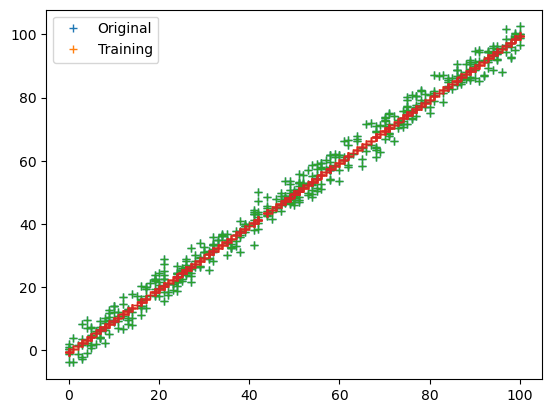

[[23.41952537]
 [49.48508957]
 [14.39683007]
 [37.45482917]
 [86.57839246]
 [35.44978577]
 [11.38926497]
 [80.56326226]
 [24.42204707]
 [ 4.37161307]
 [15.39935177]
 [15.39935177]
 [23.41952537]
 [38.45735087]
 [53.49517637]
 [59.51030656]
 [25.42456877]
 [72.54308866]
 [28.43213387]
 [30.43717727]
 [67.53048016]
 [86.57839246]
 [57.50526317]
 [53.49517637]
 [83.57082736]
 [57.50526317]
 [48.48256787]
 [19.40943857]
 [89.58595756]
 [47.48004617]
 [ 3.36909137]
 [24.42204707]
 [41.46491597]
 [-0.64099543]
 [59.51030656]
 [92.59352266]
 [38.45735087]
 [ 6.37665647]
 [20.41196027]
 [67.53048016]
 [83.57082736]
 [-0.64099543]
 [57.50526317]
 [18.40691687]
 [35.44978577]
 [18.40691687]
 [58.50778487]
 [50.48761127]
 [18.40691687]
 [32.44222067]
 [84.57334906]
 [43.46995937]
 [ 4.37161307]
 [58.50778487]
 [13.39430837]
 [ 8.38169987]
 [74.54813206]
 [68.53300186]
 [ 9.38422157]
 [16.40187347]
 [57.50526317]
 [73.54561036]
 [20.41196027]
 [50.48761127]
 [18.40691687]
 [49.48508957]
 [23.41952

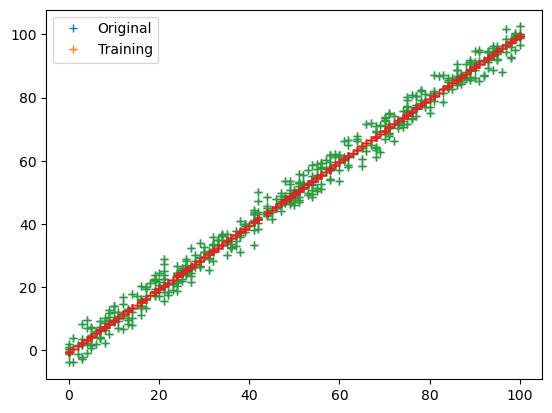

[[23.45641449]
 [49.56194189]
 [14.41988577]
 [37.51323693]
 [86.7121155 ]
 [35.50511944]
 [11.40770953]
 [80.68776302]
 [24.46047323]
 [ 4.37929831]
 [15.42394452]
 [15.42394452]
 [23.45641449]
 [38.51729568]
 [53.57817687]
 [59.60252935]
 [25.46453198]
 [72.65529305]
 [28.47670822]
 [30.48482571]
 [67.63499932]
 [86.7121155 ]
 [57.59441186]
 [53.57817687]
 [83.69993926]
 [57.59441186]
 [48.55788314]
 [19.4401795 ]
 [89.72429174]
 [47.5538244 ]
 [ 3.37523956]
 [24.46047323]
 [41.52947192]
 [-0.64099543]
 [59.60252935]
 [92.73646798]
 [38.51729568]
 [ 6.3874158 ]
 [20.44423825]
 [67.63499932]
 [83.69993926]
 [-0.64099543]
 [57.59441186]
 [18.43612075]
 [35.50511944]
 [18.43612075]
 [58.5984706 ]
 [50.56600063]
 [18.43612075]
 [32.4929432 ]
 [84.70399801]
 [43.53758941]
 [ 4.37929831]
 [58.5984706 ]
 [13.41582702]
 [ 8.39553329]
 [74.66341054]
 [68.63905807]
 [ 9.39959204]
 [16.42800326]
 [57.59441186]
 [73.6593518 ]
 [20.44423825]
 [50.56600063]
 [18.43612075]
 [49.56194189]
 [23.45641

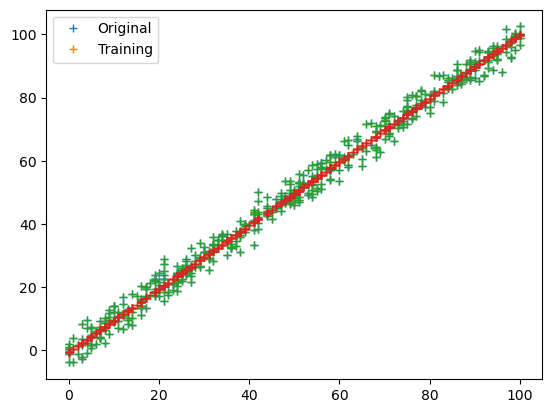

[[23.4810825 ]
 [49.61333359]
 [14.43530328]
 [37.55229463]
 [86.80153706]
 [35.54212146]
 [11.42004354]
 [80.77101758]
 [24.48616908]
 [ 4.38443748]
 [15.44038986]
 [15.44038986]
 [23.4810825 ]
 [38.55738121]
 [53.63367991]
 [59.66419939]
 [25.49125566]
 [72.73032493]
 [28.5065154 ]
 [30.51668856]
 [67.70489203]
 [86.80153706]
 [57.65402623]
 [53.63367991]
 [83.78627732]
 [57.65402623]
 [48.60824701]
 [19.46073618]
 [89.8167968 ]
 [47.60316043]
 [ 3.3793509 ]
 [24.48616908]
 [41.57264095]
 [-0.64099543]
 [59.66419939]
 [92.83205654]
 [38.55738121]
 [ 6.39461064]
 [20.46582276]
 [67.70489203]
 [83.78627732]
 [-0.64099543]
 [57.65402623]
 [18.4556496 ]
 [35.54212146]
 [18.4556496 ]
 [58.65911281]
 [50.61842017]
 [18.4556496 ]
 [32.52686172]
 [84.7913639 ]
 [43.58281411]
 [ 4.38443748]
 [58.65911281]
 [13.4302167 ]
 [ 8.4047838 ]
 [74.7404981 ]
 [68.70997861]
 [ 9.40987038]
 [16.44547644]
 [57.65402623]
 [73.73541152]
 [20.46582276]
 [50.61842017]
 [18.4556496 ]
 [49.61333359]
 [23.48108

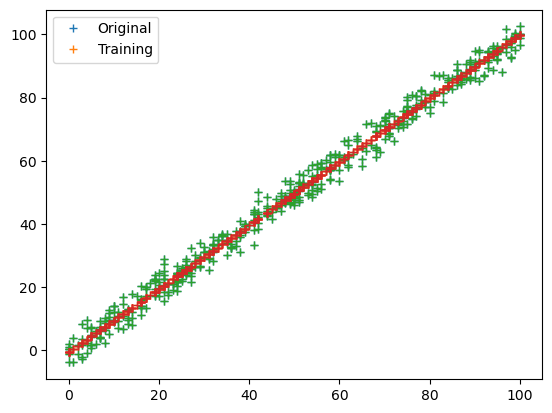

[[23.49757818]
 [49.64769959]
 [14.44561308]
 [37.57841279]
 [86.8613339 ]
 [35.56686498]
 [11.42829138]
 [80.8266905 ]
 [24.50335208]
 [ 4.38787408]
 [15.45138698]
 [15.45138698]
 [23.49757818]
 [38.58418669]
 [53.67079519]
 [59.70543859]
 [25.50912598]
 [72.7804993 ]
 [28.52644768]
 [30.53799548]
 [67.75162979]
 [86.8613339 ]
 [57.69389079]
 [53.67079519]
 [83.8440122 ]
 [57.69389079]
 [48.64192569]
 [19.47448258]
 [89.8786556 ]
 [47.63615179]
 [ 3.38210018]
 [24.50335208]
 [41.60150839]
 [-0.64099543]
 [59.70543859]
 [92.8959773 ]
 [38.58418669]
 [ 6.39942188]
 [20.48025648]
 [67.75162979]
 [83.8440122 ]
 [-0.64099543]
 [57.69389079]
 [18.46870868]
 [35.56686498]
 [18.46870868]
 [58.69966469]
 [50.65347349]
 [18.46870868]
 [32.54954328]
 [84.8497861 ]
 [43.61305619]
 [ 4.38787408]
 [58.69966469]
 [13.43983918]
 [ 8.41096968]
 [74.7920471 ]
 [68.75740369]
 [ 9.41674358]
 [16.45716088]
 [57.69389079]
 [73.7862732 ]
 [20.48025648]
 [50.65347349]
 [18.46870868]
 [49.64769959]
 [23.49757

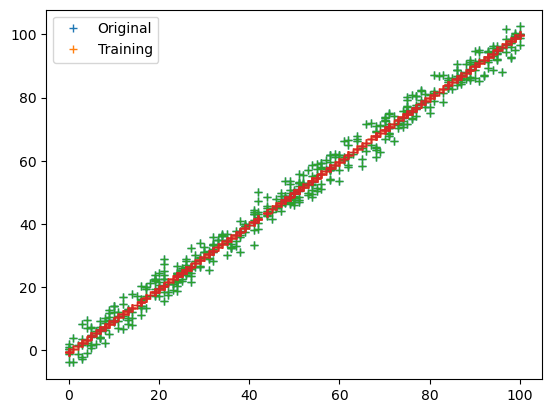

[[23.50860896]
 [49.67068038]
 [14.45250732]
 [37.59587819]
 [86.90132048]
 [35.58341115]
 [11.43380677]
 [80.86391938]
 [24.51484248]
 [ 4.39017216]
 [15.45874083]
 [15.45874083]
 [23.50860896]
 [38.6021117 ]
 [53.69561445]
 [59.73301554]
 [25.52107599]
 [72.81405125]
 [28.53977654]
 [30.55224357]
 [67.78288367]
 [86.90132048]
 [57.72054851]
 [53.69561445]
 [83.88261993]
 [57.72054851]
 [48.66444686]
 [19.4836749 ]
 [89.92002103]
 [47.65821335]
 [ 3.38393864]
 [24.51484248]
 [41.62081225]
 [-0.64099543]
 [59.73301554]
 [92.93872157]
 [38.6021117 ]
 [ 6.40263919]
 [20.48990841]
 [67.78288367]
 [83.88261993]
 [-0.64099543]
 [57.72054851]
 [18.47744138]
 [35.58341115]
 [18.47744138]
 [58.72678203]
 [50.6769139 ]
 [18.47744138]
 [32.56471061]
 [84.88885344]
 [43.63327928]
 [ 4.39017216]
 [58.72678203]
 [13.4462738 ]
 [ 8.41510622]
 [74.82651828]
 [68.78911719]
 [ 9.42133974]
 [16.46497435]
 [57.72054851]
 [73.82028477]
 [20.48990841]
 [50.6769139 ]
 [18.47744138]
 [49.67068038]
 [23.50860

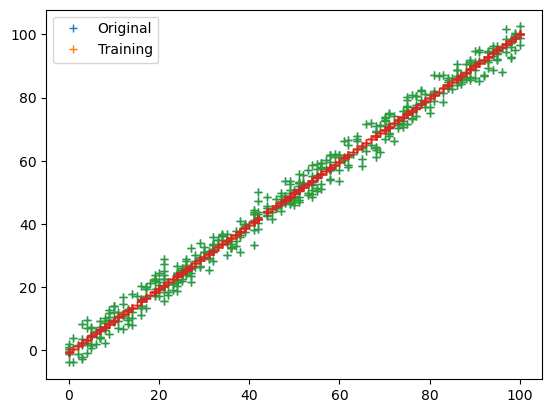

[[ 23.51598532]
 [ 49.6860478 ]
 [ 14.45711754]
 [ 37.60755743]
 [ 86.92805979]
 [ 35.5944757 ]
 [ 11.43749495]
 [ 80.8888146 ]
 [ 24.52252619]
 [  4.3917089 ]
 [ 15.46365841]
 [ 15.46365841]
 [ 23.51598532]
 [ 38.61409829]
 [ 53.71221126]
 [ 59.75145645]
 [ 25.52906705]
 [ 72.83648769]
 [ 28.54868965]
 [ 30.56177138]
 [ 67.80378336]
 [ 86.92805979]
 [ 57.73837472]
 [ 53.71221126]
 [ 83.9084372 ]
 [ 57.73837472]
 [ 48.67950694]
 [ 19.48982187]
 [ 89.94768238]
 [ 47.67296607]
 [  3.38516803]
 [ 24.52252619]
 [ 41.63372089]
 [ -0.64099543]
 [ 59.75145645]
 [ 92.96730498]
 [ 38.61409829]
 [  6.40479063]
 [ 20.49636273]
 [ 67.80378336]
 [ 83.9084372 ]
 [ -0.64099543]
 [ 57.73837472]
 [ 18.483281  ]
 [ 35.5944757 ]
 [ 18.483281  ]
 [ 58.74491558]
 [ 50.69258867]
 [ 18.483281  ]
 [ 32.5748531 ]
 [ 84.91497806]
 [ 43.64680261]
 [  4.3917089 ]
 [ 58.74491558]
 [ 13.45057668]
 [  8.41787236]
 [ 74.84956941]
 [ 68.81032423]
 [  9.42441322]
 [ 16.47019927]
 [ 57.73837472]
 [ 73.84302855]
 [ 20.49

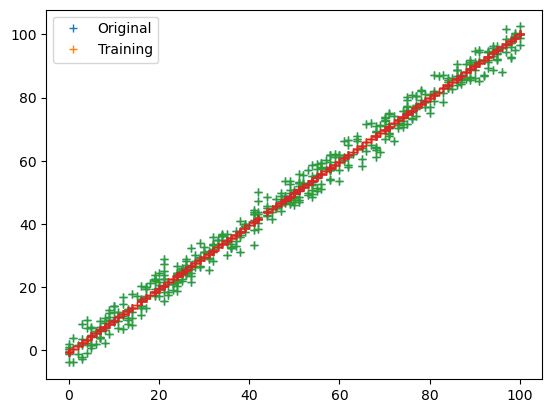

In [24]:
parameters,loss = train(train_input,train_output,0.0001,20)